## Bitcoing Analysis Project

## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import folium

In [2]:
df = pd.read_csv(r'/Users/Data Analyst/Projects/Bitcoin/bitcoin_price_Training - Training.csv')

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
df.shape

(1556, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


## Data Pre-Processing

In [7]:
df.Date = df.Date.astype('datetime64[ns]')

In [8]:
df.Date.min()

Timestamp('2013-04-28 00:00:00')

In [9]:
df.Date.max()

Timestamp('2017-07-31 00:00:00')

In [10]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
'''Changing the order of the indexes from highest to lowest and resetting the indexes again so that the dates
can go from oldest to newest.'''
data = df.sort_index(ascending=False).reset_index()
data

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [13]:
#Deleting the Index Column.
data.drop('index', axis=1, inplace=True)

In [14]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


## Changin Prices Over Time Analysis

In [15]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

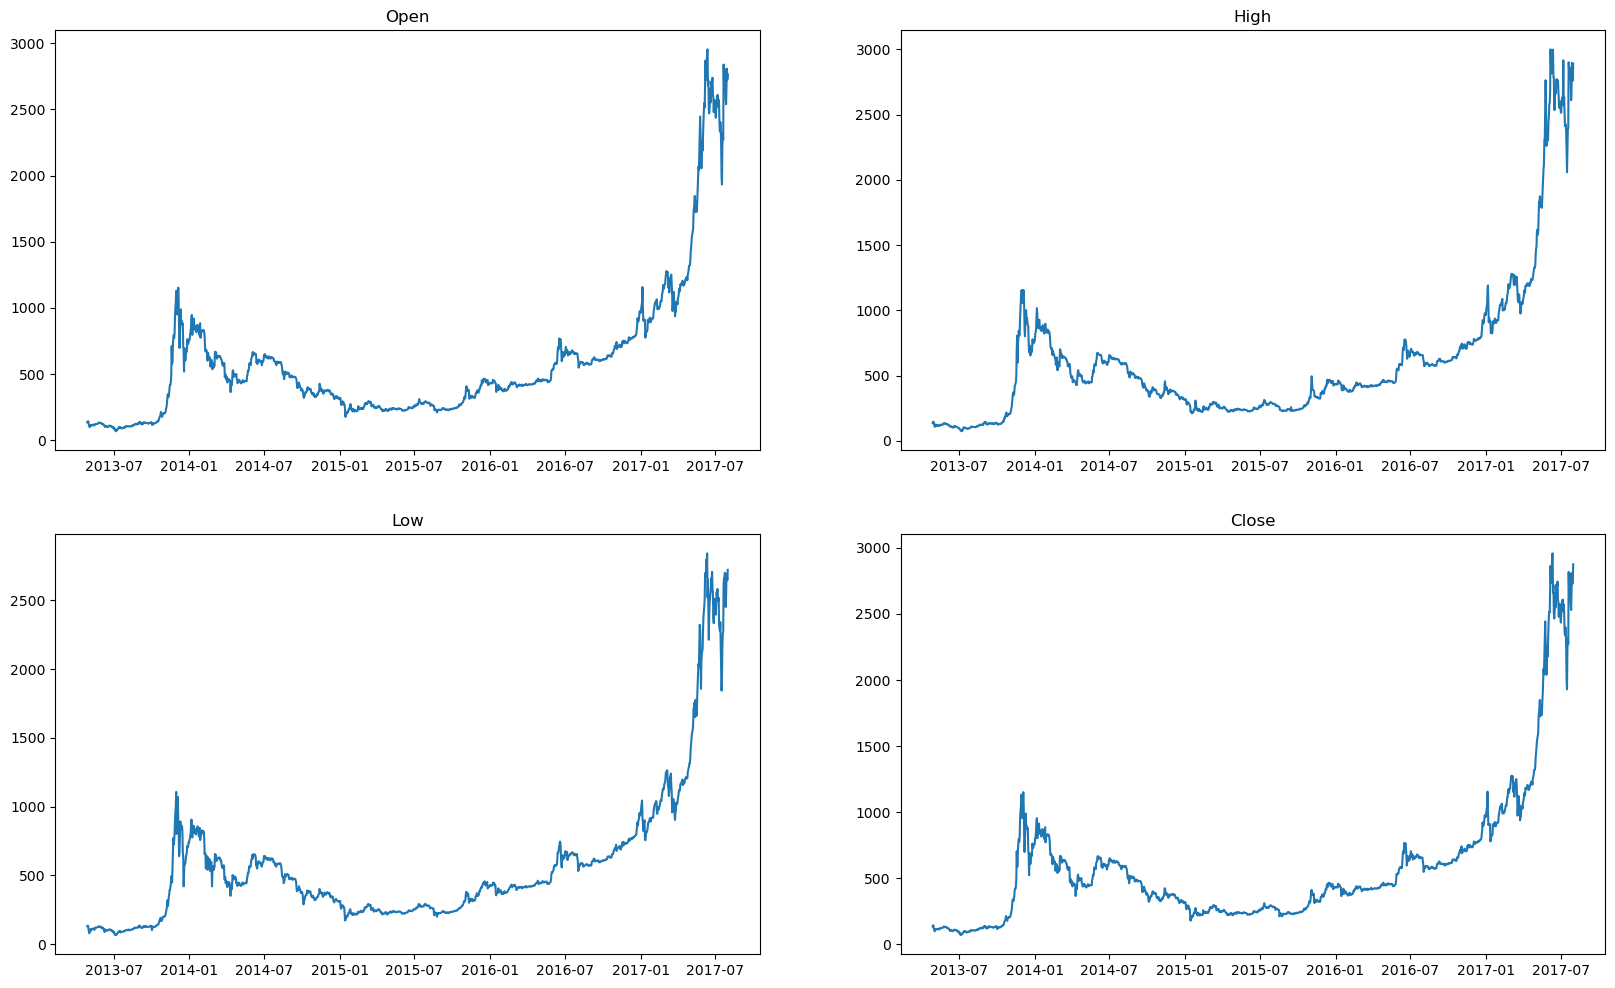

In [16]:
#Generate 4 sub-graphs of the different price measurements
plt.figure(figsize=(20,12))

for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2,2,index)
    plt.plot(df.Date, df[col])
    plt.title(col)

## Candlestick Chart

In [17]:
data.shape

(1556, 7)

In [18]:
bitcoin_sample = data[0:50]

In [19]:
init_notebook_mode(connected=True)

In [20]:
#Candlestick Chart
trace = go.Candlestick(x=bitcoin_sample['Date'],
               high=bitcoin_sample['High'],
               open=bitcoin_sample['Open'],
               close=bitcoin_sample['Close'],
               low=bitcoin_sample['Low'])

In [21]:
candle_data = [trace]

In [22]:
#Creating a Layour Class to modify the chart design.
layout = {
    'title': 'Bitcoin Historical Price',
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': 'Price'}
}

In [23]:
fig = go.Figure(data=candle_data, layout=layout)

fig.update_layout(xaxis_rangeslider_visible = False)
fig

## Closing Price In-depth Analysis

In [24]:
data['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

<Axes: >

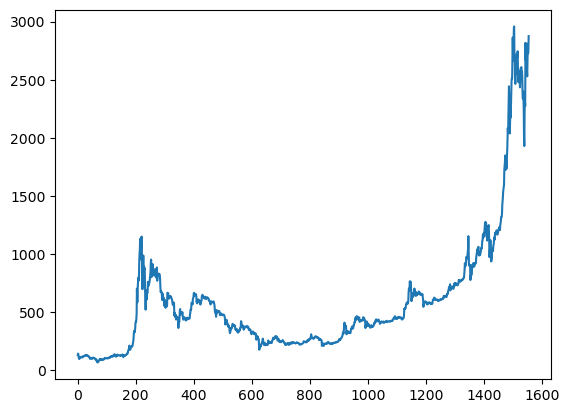

In [25]:
data['Close'].plot()

In [26]:
#Chaging the indexes for the Dates.
data.set_index('Date', inplace=True)
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

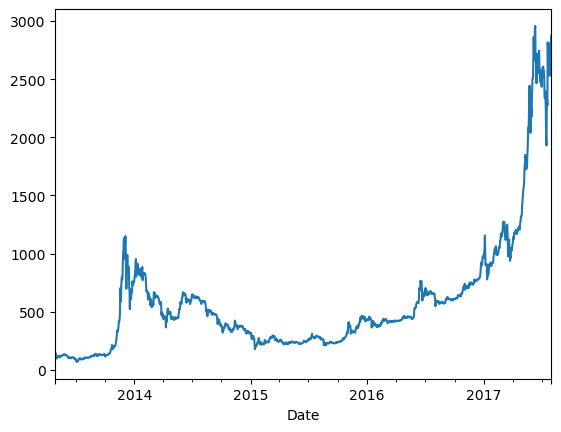

In [27]:
data['Close'].plot()

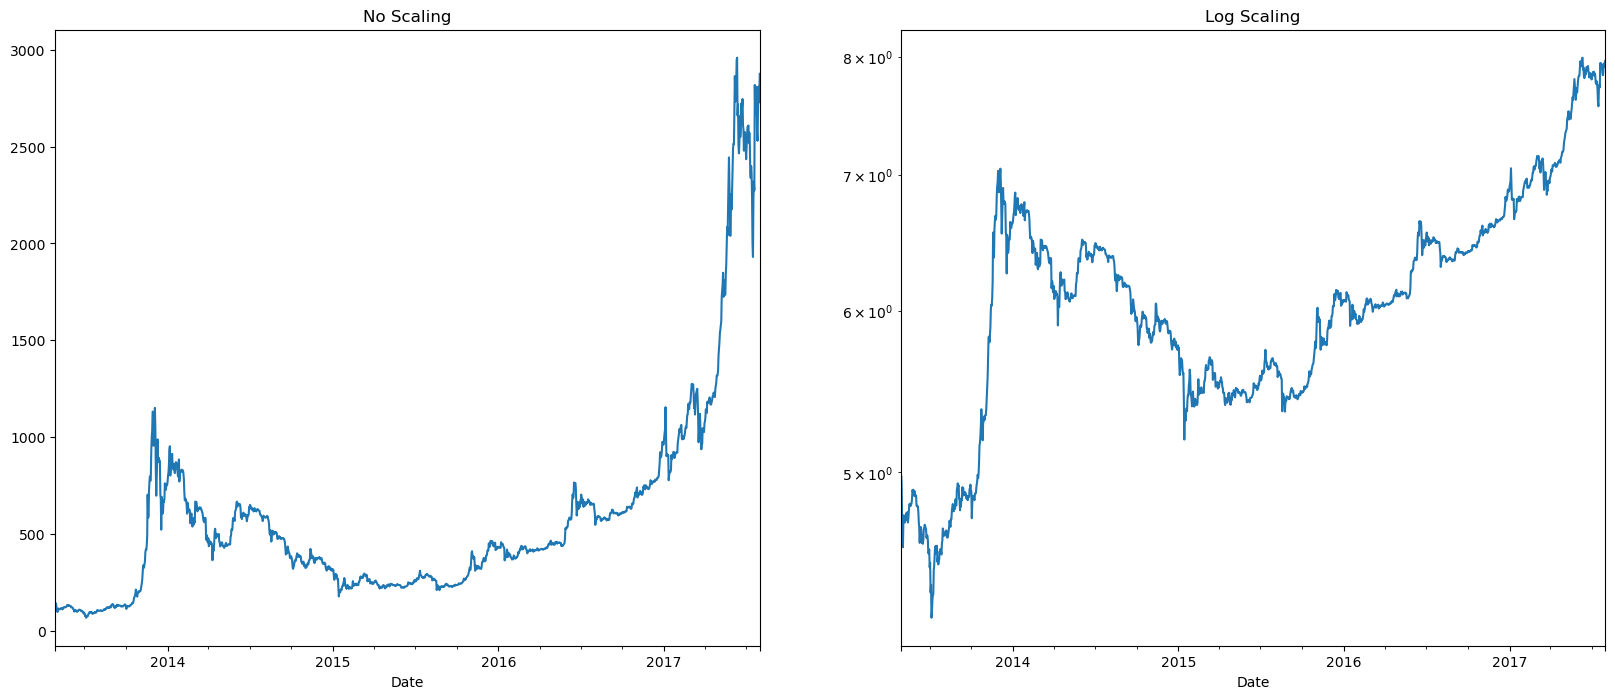

In [28]:
#Two Linear Charts with no-log and log scaling.
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No Scaling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log Scaling')
plt.yscale('log')

## Closing Price Analysis (Yearly, Quarterly & Monthly).

In [29]:
data.head(3)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [30]:
data['Close'].head(3)

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
Name: Close, dtype: float64

<Axes: xlabel='Date'>

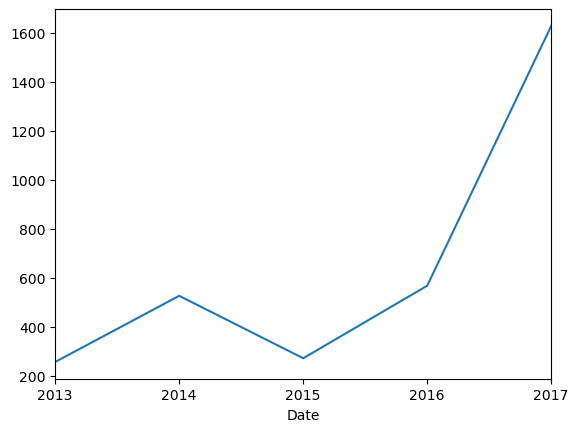

In [31]:
#Line Chart of Average Yearly Closing Prices.
data['Close'].resample('Y').mean().plot() 

<Axes: xlabel='Date'>

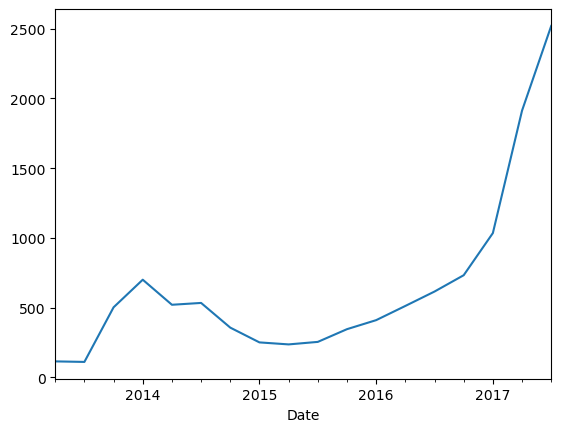

In [32]:
#Line Chart of Average Quarterly Closing Prices.
data['Close'].resample('Q').mean().plot()

<Axes: xlabel='Date'>

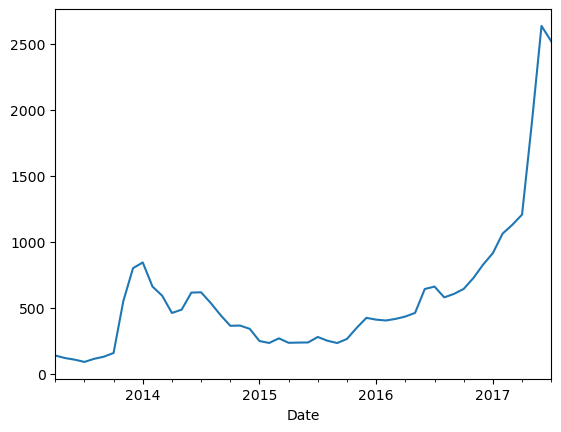

In [33]:
#Line Chart of Average Monthly Closing Prices.
data['Close'].resample('M').mean().plot()